In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data = pd.read_csv("bank.csv", delimiter=";")

In [ ]:
data_encoded = pd.get_dummies(data, columns=["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"])

In [ ]:
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV Score: 0.8935294926755463


In [ ]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[771  36]
 [ 58  40]]

Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.96      0.94       807
         yes       0.53      0.41      0.46        98

    accuracy                           0.90       905
   macro avg       0.73      0.68      0.70       905
weighted avg       0.89      0.90      0.89       905



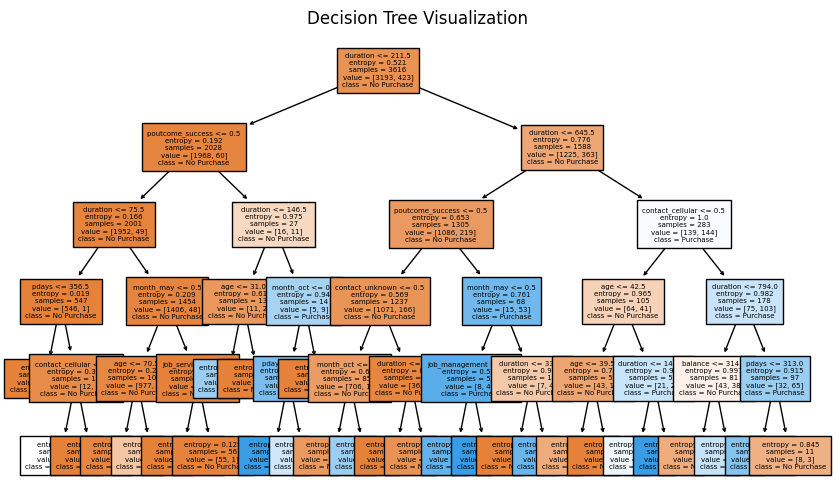

In [ ]:
plt.figure(figsize=(10, 6))
plot_tree(best_clf, feature_names=X.columns, class_names=['No Purchase', 'Purchase'], filled=True, fontsize=5)
plt.title("Decision Tree Visualization")
plt.show()